# Pré-processamento dos dados

Nesse notebook, vamos introduzir as principais etapas de pré-processamento dos dados, bem como boas práticas e algumas técnicas. Iremos utilizar uma amostra do dataset de Infarto do Miocárdio disponível [aqui](https://figshare.le.ac.uk/articles/dataset/Myocardial_infarction_complications_Database/12045261?file=23581310).

Em geral, essa etapa se divide em:

- Limpeza dos dados
- Transformação dos dados

Mas antes de começarmos, precisamos entender um pouco sobre os tipos de dados.

## Introdução

### Tipos de dados

Quando falos dos dados, estamos nos referindo aos valores de cada atributo (coluna) do dataset.

Uma das formas de se categorizar os tipos de dado é a partir de <font color='cyan'>Qualitativos</font> e <font color='cyan'>Quantitativos</font>.

- <font color='cyan'>Qualitativos</font>: Expressam qualidade, natureza da informação, categoria.
- <font color='cyan'>Quantitativos</font>: Expressam quantidades

Os dados *Qualitativos* podem ser:
- **Categóricos**: expressam categorias, geralmente são textuais (gato, cachorro...)
- **Discretos**: expressam valores numéricos não contínuos (0, 1, 2, 3...)

Os dados *Quantitativos* podem ser:
- **Contínuos**: expressam valores contínuos (0.23, 1.99...)

Dados textuais comumente são chamados também de categóricos ou de nominais.

> É importante ressaltar que essa definição pode variar em algumas literaturas

**Exemplo:**

No dataset abaixo, qual seria o tipo de dado de cada atributo?

<center>

![image.png](../figures/dataset_sample.png)

</center>

1. id: discreto
2. idade: discreto
3. renda: contínuo
4. cidade: categórico
5. uf: categórico
6. default: discreto ou contínuo

> Conhecer os tipos de dados é importante pois a maioria dos modelos de *Machine Learning* não "gosta" de trabalhar com valores textuais, e também em alguns casos, o senso de ordem nos dados pode levar a uma interpretação errada dos dados por parte do modelo.

<center>
<div>
<img src=../figures/words_x_numbers.png width="400"/>
</div>
</center>

Em resumo, no geral:

- Buscamos trabalhar com dados com valores numéricos (contínuos ou discretos)
- É importante saber diferenciar quando o valor discreto ou categórico tem sentido de ordem
- Caso haja valores textuais, é preciso transformá-los em valores numéricos: veremos técnicas para isso

### Qualidade dos dados

Já entendemos os tipos de dados, porém na maioria das vezes os *datasets* possuem muita informação incorreta ou irrelevante, o que chamamos de *Dirty data*, ou dados sujos.

Esses dados sujos podem ser:
- valores errados;
- valores mal-formatados;
- valores faltantes;
- duplicados;
- etc.


<center>

<div>
<img src=../figures/Least-enjoyable-part-of-data-science.webp/>
</div>

Fonte: [Dirty Data: How Much it Can Cost Your Business and How to Get Rid of it](https://www.cazoomi.com/blog/dirty-data-how-much-it-can-cost-your-business-and-how-to-get-rid-of-it/)

</center>

Por exemplo, se um dataset possui um atributo "idade", e uma ocorrências possui o valor "gato", claramente há um erro neste dado, pois não existe a idade "gato".

Mas então, como tratamos esses casos?

O processo de tratar o *dirty data* é chamado de limpeza de dados (*data cleaning* ou *data cleansing*), e coinsiste em remover ou corrigir dados incorretos ou faltantes.

Existem várias formas de se realizar esse processo, as mais comuns são:

- Remover colunas desnecessárias;
- Remover uma linha (amostra) com dados incorretos ou faltantes;
- Substituir valores incorretos pela média, mediana ou moda do atributo;
- Preencher valores faltantes com a média, mediana ou moda do atributo.

Para tal, cabe ao cientista saber avaliar qual a melhor técnica. Se o número de amostras com dados comprometidos é pequeno comparado a quantidade de dados no dataset, removê-las pode ser uma abordagem prática, porém caso a porcentagem de linhas removidas seja muito alta, isso pode comprometer a qualidade dos dados do ponto de vista do modelo.

A seguir, vamos explorar algumas técnicas de limpeza dos dados.

Dependências

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Limpeza dos dados

In [19]:
df = pd.read_csv('Myocardial infarction complications Database.csv')
df = df.sample(20).reset_index(drop=True)       # Selecionando aleatoriamente uma amostra de 20 linhas
df.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,921,69.0,1,0.0,NaN,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,373,65.0,1,1.0,0.0,0.0,NaN,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,165,38.0,1,0.0,0.0,0.0,0.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1624,85.0,0,2.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,1,0,4
4,1279,63.0,1,2.0,NaN,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,1,1,1,0


O dataset possui 124 colunas (atributos).

A partir dos [documentos descritivos](https://figshare.le.ac.uk/articles/dataset/Myocardial_infarction_complications_Database/12045261?file=22803572) disponibilizados pelos autores, sabemos que:

1. As colunas 2-112 são as características dos pacientes com relação ao infarto do miocárdio, e podem ser os inputs do modelo posteriormente;
2. As colunas 113-124 são as possíveis complicações causadas pela doença (target do modelo)

Em reunião interna, foi decidido que iríamos tratar apenas da complicação *CHRONIC HEART FAILURE* (insuficiência cardíaca crônica), que é a coluna ZSN, logo, as demais colunas de output podem ser removidas. A coluna "id" também não é relevante e pode ser removida.

> Para fins didáticos, iremos selecionar apenas 10 colunas de *input* para trabalharmos, porém na prática a remoção de alguma dessas colunas deve ser feita somente após avaliação do impacto no modelo

In [20]:
input_data = df.iloc[:, 1:10]       # Selecionando apenas 10 colunas de input
target_data = df['ZSN']

In [21]:
input_data.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT
0,69.0,1,0.0,NaN,2.0,1.0,NaN,2.0,0.0
1,65.0,1,1.0,0.0,0.0,NaN,NaN,2.0,0.0
2,38.0,1,0.0,0.0,0.0,0.0,NaN,2.0,0.0
3,85.0,0,2.0,6.0,2.0,1.0,NaN,2.0,0.0
4,63.0,1,2.0,NaN,2.0,2.0,NaN,0.0,0.0


In [22]:
target_data.head()

0    0
1    1
2    0
3    1
4    1
Name: ZSN, dtype: int64

Como ambos os datasets de input e target possuem os mesmos indexes e não perderam a ordenação, podemos uní-los para termos novamente um único dataset

In [23]:
data_clean = pd.concat([input_data, target_data], axis=1)
data_clean.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,ZSN
0,69.0,1,0.0,NaN,2.0,1.0,NaN,2.0,0.0,0
1,65.0,1,1.0,0.0,0.0,NaN,NaN,2.0,0.0,1
2,38.0,1,0.0,0.0,0.0,0.0,NaN,2.0,0.0,0
3,85.0,0,2.0,6.0,2.0,1.0,NaN,2.0,0.0,1
4,63.0,1,2.0,NaN,2.0,2.0,NaN,0.0,0.0,1


In [24]:
for col in data_clean:
    print(f"{col}:{data_clean[col].unique()}")

AGE:[69. 65. 38. 85. 63. 76. 53. 80. 42. 73. 72. 71. 66. 52. 68. 78. 58. 61.]
SEX:[1 0]
INF_ANAM:[0. 1. 2.]
STENOK_AN:[nan  0.  6.  4.  1.  2.  5.]
FK_STENOK:[2. 0. 1. 3.]
IBS_POST:[ 1. nan  0.  2.]
IBS_NASL:[nan]
GB:[2. 0. 3.]
SIM_GIPERT:[0. 1.]
ZSN:[0 1]


Podemos ver que
- O atributo `AGE` pode ser considerado do tipo discreto
- O atributo `SEX` é do tipo binário (categórico numérico - já foram processados para se tornarem discretos)
- Todos os demais atributos de input são categóricos numérico - já foram processados para se tornarem discretos
- O target ZSN é binário (categórico numérico - já foram processados para se tornarem discretos)

Agora podemos explorar um pouco mais os dados. A função `describe` do `Pandas` permite uma visualização prática de algumas medidas estatísticas básicas do dataset como um todo.

In [25]:
data_clean.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,ZSN
count,20.000000,20.000000,20.000000,18.000000,20.00000,19.000000,0.0,20.000000,20.000000,20.000000
mean,65.550000,0.550000,0.550000,2.444444,1.15000,1.263158,NaN,1.550000,0.050000,0.500000
std,12.236593,0.510418,0.686333,2.683769,1.03999,0.733493,NaN,1.099043,0.223607,0.512989
min,38.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN,0.000000,0.000000,0.000000
25%,60.250000,0.000000,0.000000,0.000000,0.00000,1.000000,NaN,0.000000,0.000000,0.000000
50%,67.000000,1.000000,0.000000,1.500000,1.50000,1.000000,NaN,2.000000,0.000000,0.500000
75%,73.750000,1.000000,1.000000,5.750000,2.00000,2.000000,NaN,2.000000,0.000000,1.000000
max,85.000000,1.000000,2.000000,6.000000,3.00000,2.000000,NaN,3.000000,1.000000,1.000000


Podemos extrair algumas informações, como:

- A média de idade nas amostras selecionadas é em torno de 58 anos, o desvio padrão é baixo e a máxima e mínima estão dentro da realidade, ou seja, provavelmente não há *outliers*;
- Para as demais colunas, a média e quartis não nos dão informação relevante, pois são valores discretos, categorias, não contínuos;
- Pela contagem (count), há alguns valores vazios;
- Pela coluna máxima e mínima, é possível ver que os valores estão dentro das categorias esperadas.



Descobrindo qual a porcentagem de vazios nos dados

In [26]:
def perc_empty(data: pd.DataFrame):
    """
    Print the percentage of empty (NaN) data
    
    Args:
        data (pd.DataFrame): dataset
    """
    print(data.isna().sum()/data.shape[0])

In [27]:
perc_empty(data_clean)

AGE           0.00
SEX           0.00
INF_ANAM      0.00
STENOK_AN     0.10
FK_STENOK     0.00
IBS_POST      0.05
IBS_NASL      1.00
GB            0.00
SIM_GIPERT    0.00
ZSN           0.00
dtype: float64


Vemos que há 3 colunas com valores vazios: `STENOK_AN`, `FK_STENOK` e `IBS_NASL`. As duas primeiras possuem apenas 5% dos dados vazios, enquanto `IBS_NASL` possui 95%. Como estamos trabalhando com uma amostragem aleatória da base e não com ela completa, vamos optar por remover essa coluna, já que não há forma de preencher os dados de maneira satisfatória devido a grande quantidade de vazios (se estivéssemos trabalhando com a base completa, essa porcentagem provavelmente seria menor).

In [28]:
data_clean = data_clean.drop(columns=['IBS_NASL'])
data_clean.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,ZSN
0,69.0,1,0.0,NaN,2.0,1.0,2.0,0.0,0
1,65.0,1,1.0,0.0,0.0,NaN,2.0,0.0,1
2,38.0,1,0.0,0.0,0.0,0.0,2.0,0.0,0
3,85.0,0,2.0,6.0,2.0,1.0,2.0,0.0,1
4,63.0,1,2.0,NaN,2.0,2.0,0.0,0.0,1


As outras duas colunas podem ser preenchidas com, por exemplo, a moda (lembrando que como os valores são discretos, não faz sentido utilizar a média)

In [29]:
# Dicionário com a primeira moda para cada uma das colunas
values = {
    'STENOK_AN': data_clean['STENOK_AN'].mode()[0],
    'FK_STENOK': data_clean['FK_STENOK'].mode()[0],
}
values

{'STENOK_AN': 0.0, 'FK_STENOK': 2.0}

In [30]:
data_clean = data_clean.fillna(values)
perc_empty(data_clean)

AGE           0.00
SEX           0.00
INF_ANAM      0.00
STENOK_AN     0.00
FK_STENOK     0.00
IBS_POST      0.05
GB            0.00
SIM_GIPERT    0.00
ZSN           0.00
dtype: float64


Podemos ver agora que a porcentagem de vazios é 0.

Podemos definir os tipos de dados discretos como inteiro

In [31]:
data_clean.dtypes

AGE           float64
SEX             int64
INF_ANAM      float64
STENOK_AN     float64
FK_STENOK     float64
IBS_POST      float64
GB            float64
SIM_GIPERT    float64
ZSN             int64
dtype: object

In [32]:
data_clean = data_clean.astype('int32')
data_clean.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## Visualização dos dados

O *boxplot* é um gráfico útil para visualizar a distribuição dos dados e encontrar *outliers*, pois esse gráfico apresenta também a mediana, o valor mínimo, máximo, quartil 25% e quartil 75%.

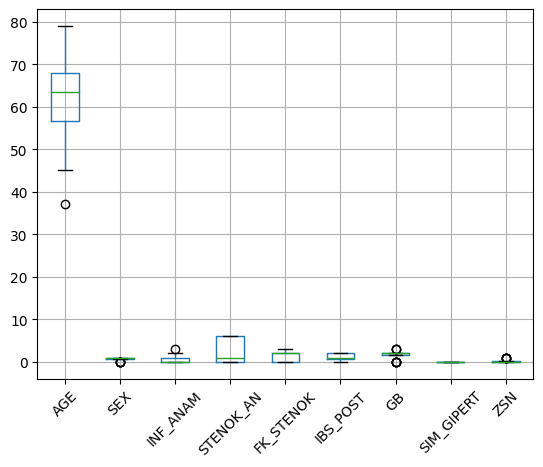

In [ ]:
data_clean.boxplot(rot=45)
plt.show()

O histograma é um gráfico clássico utilizado para visualizar as distribuições de frequência dos dados. No eixo x tem-se os valores, e no eixo y tem-se a frequência que cada valor aparece no *dataset*.

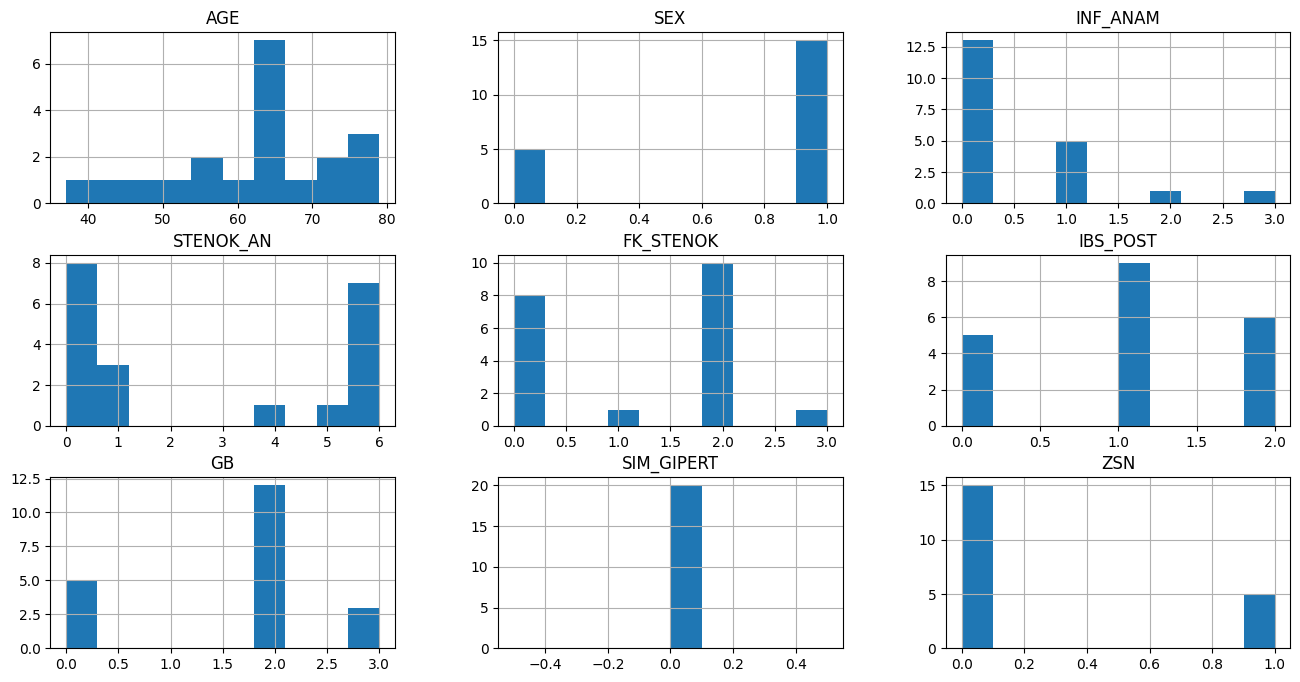

In [ ]:
data_clean.hist(figsize=(16, 8))
plt.show()

## Transformação dos dados

Os dados categóricos nominais já estão transformados de forma numérica, em um processo chamado `discretização`, que consiste em converter valores categóricos nominais em números discretos, mapeando cada categoria em um número inteiro.

Exemplo:

| Atributo nominal | Atributo convertido - discreto |
| --- | --- |
| Gato | 0 |
| Cachorro | 1 |
| Tigre | 2 |

<div class="alert alert-block alert-warning">
<b>ATENÇÃO:</b> Essa técnica é simples e fácil de aplicar, porém nem sempre será a melhor opção, pois muitas vezes os modelos podem "entender" um sentido de ordenação nos dados (0 < 1 < 2), o que pode prejudicar o aprendizado do modelo.
</div>



Outra técnica bastante comum é a `One Hot Encoder`, que cria um novo atributo para cada valor categórico, e define o valor 1 para a categoria correta, e 0 para as demais. Para mais informações sobre esse método, veja [Sklearn - OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

| Atributo nominal | Gato |  Cachorro |  Tigre |
| --- | --- | --- | --- |
| Gato | 1 | 0 | 0 |
| Cachorro | 0 | 1 | 0 |
| Tigre | 0 | 0 | 1 |

<div class="alert alert-block alert-warning">
<b>ATENÇÃO:</b> O One Hot Encoder tem a vantagem de não criar ordenação nos dados, porém deve ser usada com cautela, pois ela aumenta exponencialmente a quantidade de atributos do dataset, podendo gerar o que chamamos de <a href=https://medium.com/data-hackers/maldição-da-dimensionalidade-655e4342d64>Maldição da Dimensionalidade </a>.
</div>


### Normalização dos dados

Em construção...

## *Feature selection*

Em construção...